In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data loading and preparation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Zalando Analysis/df_ecommerce.csv')

In [ ]:
df.head()

,CustomerID,OrderID,OrderDate,Qty,OrderCount,Month-Year,DayoftheWeek,BasePrice,DiscountPercent,FinalPrice,...,ReturnValue,NetSales,ReturnProcessingCost,ReturnLogisticsCost,CLVSegment,DayOfWeek,IsWeekend,Month,Quarter,CLV
0,8270,ORD100000,31-12-2023,7,1,Dec-23,Sunday,105.89,20,84.71,...,84.71,0.00,8.91,3.95,Low,6,True,12,4,0.00
1,1860,ORD100001,30-07-2024,5,1,Jul-24,Tuesday,24.99,20,19.99,...,0.00,19.99,0.00,0.00,Low,1,False,7,3,19.99
2,6390,ORD100002,22-11-2023,2,3,Nov-23,Wednesday,166.84,25,125.13,...,0.00,125.13,0.00,0.00,Medium,2,False,11,4,125.13
3,6191,ORD100003,03-08-2024,2,2,Aug-24,Saturday,59.86,0,59.86,...,0.00,59.86,0.00,0.00,Low,5,True,8,3,62.36
4,6734,ORD100004,24-09-2024,10,1,Sep-24,Tuesday,15.72,5,14.93,...,0.00,14.93,0.00,0.00,Low,1,False,9,3,14.93


In [ ]:
df.describe()

,CustomerID,Qty,OrderCount,BasePrice,DiscountPercent,FinalPrice,CustomerAge,Qty returned,Returned_Orders,ReturnProcessingDays,...,RefundAmount,GrossSales,ReturnValue,NetSales,ReturnProcessingCost,ReturnLogisticsCost,DayOfWeek,Month,Quarter,CLV
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3598.000000,...,3598.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5462.898000,5.498900,2.132200,45.45755,13.673000,39.201810,35.002300,1.090100,0.359800,3.303224,...,36.942704,39.201810,13.291985,25.909824,4.132019,0.545070,2.993600,6.497800,2.501100,55.860972
std,2589.212679,2.884585,1.063972,40.70843,13.221443,36.007374,11.109646,1.848384,0.479966,1.491537,...,33.794439,36.007374,26.930243,35.439193,5.644058,1.489264,2.016722,3.434556,1.116299,61.719318
min,1001.000000,1.000000,1.000000,10.00000,0.000000,5.000000,18.000000,0.000000,0.000000,1.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3217.000000,3.000000,1.000000,19.56000,5.000000,16.630000,26.000000,0.000000,0.000000,2.000000,...,15.732500,16.630000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,13.560000
50%,5477.000000,5.000000,2.000000,33.28500,10.000000,28.300000,34.000000,0.000000,0.000000,3.000000,...,26.540000,28.300000,0.000000,15.440000,0.000000,0.000000,3.000000,7.000000,3.000000,38.410000
75%,7698.000000,8.000000,3.000000,56.66000,20.000000,49.092500,43.000000,2.000000,1.000000,4.000000,...,46.692500,49.092500,17.982500,36.372500,10.100000,0.000000,5.000000,9.000000,3.000000,79.560000
max,9998.000000,10.000000,6.000000,500.00000,50.000000,500.000000,70.000000,7.000000,1.000000,7.000000,...,450.000000,500.000000,450.000000,500.000000,15.000000,5.950000,6.000000,12.000000,4.000000,792.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               10000 non-null  int64  
 1   OrderID                  10000 non-null  object 
 2   OrderDate                10000 non-null  object 
 3   Qty                      10000 non-null  int64  
 4   OrderCount               10000 non-null  int64  
 5   Month-Year               10000 non-null  object 
 6   DayoftheWeek             10000 non-null  object 
 7   BasePrice                10000 non-null  float64
 8   DiscountPercent          10000 non-null  int64  
 9   FinalPrice               10000 non-null  float64
 10  CustomerAge              10000 non-null  int64  
 11  AgeGroup                 10000 non-null  object 
 12  Gender                   10000 non-null  object 
 13  MarketingChannel         10000 non-null  object 
 14  Device                 

### Chi-squared for Return Rate by Marketing Channel

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table: counts of returned vs. not returned for each marketing channel
contingency_table = pd.crosstab(df['MarketingChannel'], df['Returned_Orders'])

print("Contingency Table (MarketingChannel vs. Returned_Orders):")
print(contingency_table)

# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in return rates across different Marketing Channels.")
else:
    print("Conclusion: There is no statistically significant difference in return rates across different Marketing Channels.")

# You can repeat this for 'Category', 'Device', 'AgeGroup', etc.

Contingency Table (MarketingChannel vs. Returned_Orders):
Returned_Orders      0    1
MarketingChannel           
Direct            1266  667
Email             1064  399
Facebook Ads       708  528
Google Ads        1319  681
Instagram          856  648
Referral           547  260
TikTok             280  219
YouTube            362  196

Chi-squared Statistic: 129.22
P-value: 0.0000
Conclusion: There is a statistically significant difference in return rates across different Marketing Channels.




1.  There is a Statistically Significant Association: In conclusion "There is a statistically significant difference in return rates across different Marketing Channels" is correct and directly supported by the p-value. This means the observed differences in return rates based on marketing channel are not random chance. There's a genuine relationship.
2. Marketing Channel Matters for Returns: The marketing channel through which an order is placed does have a statistically significant impact on whether that order is returned. Different channels are associated with different return probabilities.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table: counts of returned vs. not returned for each marketing channel
contingency_table = pd.crosstab(df['Category'], df['Returned_Orders'])

print("Contingency Table (Category vs. Returned_Orders):")
print(contingency_table)

# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in return rates across different Categories.")
else:
    print("Conclusion: There is no statistically significant difference in return rates across different Categories")

Contingency Table (Category vs. Returned_Orders):
Returned_Orders     0    1
Category                  
Accessories       142   66
Accessories_Kids   90   22
Bags              333   88
Beauty            289   50
Clothing_Kids     342  144
Dresses           528  420
Electronics        75   16
Home              160   43
Jackets           668  339
Jeans             677  491
Lingerie          136  125
Pants             211   78
Shirts            352  167
Shoes             724  767
Shoes_Kids        129  105
Skirts            196   72
Sportswear        523  222
T-Shirts          273  112
Tops              554  271

Chi-squared Statistic: 438.87
P-value: 0.0000
Conclusion: There is a statistically significant difference in return rates across different Categories.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table: counts of returned vs. not returned for each marketing channel
contingency_table = pd.crosstab(df['AgeGroup'], df['Returned_Orders'])

print("Contingency Table (AgeGroup vs. Returned_Orders):")
print(contingency_table)

# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in return rates across different AgeGroup.")
else:
    print("Conclusion: There is no statistically significant difference in return rates across different AgeGroup.")

Contingency Table (AgeGroup vs. Returned_Orders):
Returned_Orders     0     1
AgeGroup                   
18-25            1467   774
26-35            1941  1126
36-45            1839  1047
46-55             891   522
56-65             220   111
65+                44    18

Chi-squared Statistic: 5.58
P-value: 0.3495
Conclusion: There is no statistically significant difference in return rates across different AgeGroup.


## Feature Selection and Engineering

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import numpy as np

# Define features (X) and target (y)
features = [
    'MarketingChannel', 'Device', 'FirstTimeBuyer', 'UsedSizeGuide', 'Category', 'AgeGroup', 'CLV'
]
X = df[features].copy() # Make a copy immediately to avoid modifying original df
y = df['Returned_Orders']
# Convert boolean-like columns to int 0/1 *BEFORE* identifying numerical and categorical features
X['FirstTimeBuyer'] = X['FirstTimeBuyer'].astype(int)
X['UsedSizeGuide'] = X['UsedSizeGuide'].astype(int)

# Identify categorical and numerical features *AFTER* type conversions
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

print(f"Numerical features for preprocessor: {list(numerical_features)}")
print(f"Categorical features for preprocessor: {list(categorical_features)}")

Numerical features for preprocessor: ['FirstTimeBuyer', 'UsedSizeGuide', 'CLV']
Categorical features for preprocessor: ['MarketingChannel', 'Device', 'Category', 'AgeGroup']


## Train-Test Split

In [ ]:
# Create a preprocessor to handle one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features) # 'passthrough' for numerical features
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Proportion of returns in y_train: {y_train.sum() / len(y_train):.4f}")
print(f"Proportion of returns in y_test: {y_test.sum() / len(y_test):.4f}")





X_train shape: (8000, 7)
X_test shape: (2000, 7)
y_train shape: (8000,)
y_test shape: (2000,)
Proportion of returns in y_train: 0.3599
Proportion of returns in y_test: 0.3595


In [ ]:
# Apply preprocessing to X_train to get the transformed data for statsmodels
X_train_transformed = preprocessor.fit_transform(X_train)

print(f"\nShape of X_train_transformed: {X_train_transformed.shape}")
print(f"Type of X_train_transformed: {type(X_train_transformed)}")

# Get the feature names after preprocessing to create a DataFrame
transformed_feature_names = preprocessor.get_feature_names_out()

print(f"Length of transformed_feature_names: {len(transformed_feature_names)}")
print(f"First 5 transformed_feature_names: {transformed_feature_names[:5]}")

# Convert sparse matrix to dense array
X_train_transformed_dense = X_train_transformed.toarray()

X_train_transformed_df = pd.DataFrame(
    X_train_transformed_dense,
    columns=transformed_feature_names,
    index=X_train.index
)

# Add a constant (intercept) term for statsmodels
X_train_transformed_df = sm.add_constant(X_train_transformed_df, has_constant='add')

# Fit the Logistic Regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_transformed_df)
result = logit_model.fit()

print("\n--- Logistic Regression Summary (Statsmodels) ---")
print(result.summary())


Shape of X_train_transformed: (8000, 39)
Type of X_train_transformed: <class 'scipy.sparse._csr.csr_matrix'>
Length of transformed_feature_names: 39
First 5 transformed_feature_names: ['cat__MarketingChannel_Direct' 'cat__MarketingChannel_Email'
 'cat__MarketingChannel_Facebook Ads' 'cat__MarketingChannel_Google Ads'
 'cat__MarketingChannel_Instagram']
Optimization terminated successfully.
         Current function value: 0.543425
         Iterations 6

--- Logistic Regression Summary (Statsmodels) ---
                           Logit Regression Results                           
Dep. Variable:        Returned_Orders   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7964
Method:                           MLE   Df Model:                           35
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.1682
Time:                        18:03:47   Log-Likelihood:                -4347.4
converged:       

## Model Selection and Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # Already imported, but listed for clarity

# --- Model 1: Logistic Regression ---
# Good for interpretability and provides coefficients (statistical significance)
model_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear')) # solver='liblinear' is good for smaller datasets and various regularization
])

print("Training Logistic Regression model...")
model_logistic.fit(X_train, y_train)
print("Logistic Regression model trained.")

# --- Model 2: Random Forest Classifier ---
# Often provides higher predictive accuracy, but can be less interpretable
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100)) # n_estimators is number of trees
])

print("\nTraining Random Forest model...")
model_rf.fit(X_train, y_train)
print("Random Forest model trained.")

Training Logistic Regression model...
Logistic Regression model trained.

Training Random Forest model...
Random Forest model trained.


## Model Evaluation

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Evaluates a trained classification model and prints key metrics."""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(model_logistic, X_test, y_test, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(model_rf, X_test, y_test, "Random Forest")


--- Logistic Regression Evaluation ---
Accuracy: 0.7375
Precision: 0.6678
Recall: 0.5369
F1-Score: 0.5952
ROC AUC Score: 0.7693

Confusion Matrix:
[[1089  192]
 [ 333  386]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1281
           1       0.67      0.54      0.60       719

    accuracy                           0.74      2000
   macro avg       0.72      0.69      0.70      2000
weighted avg       0.73      0.74      0.73      2000


--- Random Forest Evaluation ---
Accuracy: 0.7675
Precision: 0.7268
Recall: 0.5661
F1-Score: 0.6364
ROC AUC Score: 0.7809

Confusion Matrix:
[[1128  153]
 [ 312  407]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1281
           1       0.73      0.57      0.64       719

    accuracy                           0.77      2000
   macro avg       0.76      0.72      0.73      2000
weighted 

## Feature Importance


--- Logistic Regression Coefficients ---
cat__Category_Shoes                   0.882456
cat__Category_Shoes_Kids              0.653258
cat__Category_Lingerie                0.596574
cat__Category_Dresses                 0.564620
cat__Category_Jeans                   0.552093
cat__MarketingChannel_Instagram       0.319630
num__FirstTimeBuyer                   0.294404
cat__MarketingChannel_TikTok          0.262929
cat__MarketingChannel_Facebook Ads    0.254294
cat__Device_Mobile                    0.170592
dtype: float64
cat__Category_Beauty             -0.893291
cat__Category_Home               -0.599070
num__UsedSizeGuide               -0.591145
cat__Category_Accessories_Kids   -0.545274
cat__Category_Electronics        -0.514173
cat__MarketingChannel_Email      -0.457770
cat__Category_Bags               -0.311788
cat__AgeGroup_65+                -0.284006
cat__Category_Pants              -0.283090
cat__Category_Skirts             -0.249864
dtype: float64

--- Random Forest Top 10 Fe

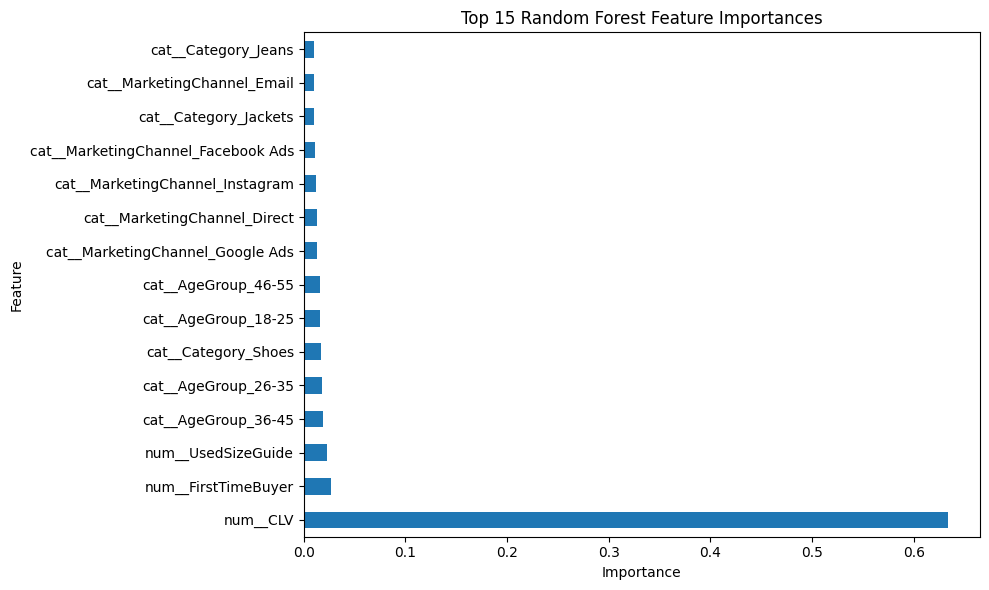

In [ ]:
# Logistic Regression Coefficients
transformed_feature_names = model_logistic.named_steps['preprocessor'].get_feature_names_out()
coefficients = model_logistic.named_steps['classifier'].coef_[0] # For binary classification

# Create a Series for better viewing
lr_coefficients = pd.Series(coefficients, index=transformed_feature_names)
print("\n--- Logistic Regression Coefficients ---")
print(lr_coefficients.sort_values(ascending=False).head(10)) # Top 10 positive coefficients
print(lr_coefficients.sort_values(ascending=True).head(10))  # Top 10 negative coefficients

# Random Forest Feature Importances
if hasattr(model_rf.named_steps['classifier'], 'feature_importances_'):
    rf_importances = model_rf.named_steps['classifier'].feature_importances_

    transformed_feature_names_rf = model_rf.named_steps['preprocessor'].get_feature_names_out()
    feature_importances_rf = pd.Series(rf_importances, index=transformed_feature_names_rf)

    print("\n--- Random Forest Top 10 Feature Importances ---")
    print(feature_importances_rf.nlargest(10))

   # Visualize feature importances
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    feature_importances_rf.nlargest(15).plot(kind='barh')
    plt.title('Top 15 Random Forest Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()